# KOSPI 종가(1975/01/04 ~ 2023/01/04)

In [13]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


series = pd.read_csv('KOSPI.csv',
                     header=0, index_col=0)  # 12965개
series


,KOSPI
Date,
1975-01-04,65.69
1975-01-06,65.32
1975-01-07,66.30
1975-01-08,67.15
1975-01-09,67.32
...,...
2022-12-28,2280.45
2022-12-29,2236.40
2023-01-02,2225.67


<AxesSubplot:xlabel='Date'>

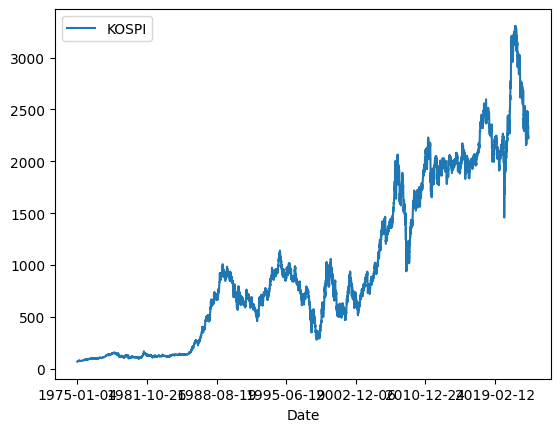

In [15]:
series.plot()

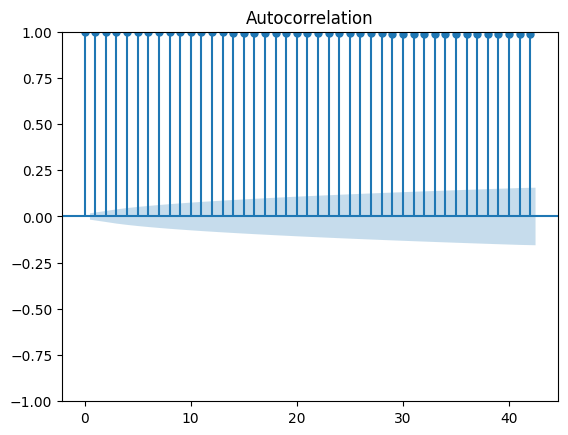

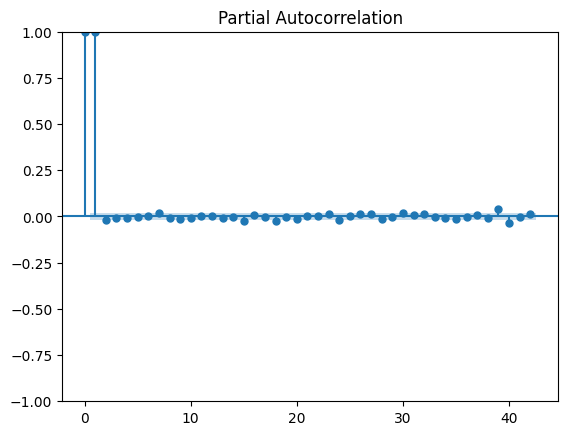

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(series)
plot_pacf(series)
plt.show()

In [17]:
from pmdarima import auto_arima


opt = auto_arima(series[:10000], seasonal=False,
                 trace=True, information_criterion='bic')
print(opt.summary())


Performing stepwise search to minimize bic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : BIC=77638.789, Time=2.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=77642.087, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=77624.181, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=77622.260, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=77635.700, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=77621.813, Time=2.81 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : BIC=77629.281, Time=3.86 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : BIC=77629.404, Time=5.70 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : BIC=77620.893, Time=0.64 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : BIC=77629.171, Time=1.88 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : BIC=77638.371, Time=7.63 sec
 ARIMA(0,1,2)(0,0,0)[0]             : BIC=77614.392, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0]             : BIC=77615.582, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0]             : BIC=77622.878, Time=2.20 sec
 ARIMA(0,1,3)(0,0,0

In [20]:
series.iloc[9999]

KOSPI    2037.53
Name: 2010-12-23 00:00:00, dtype: float64

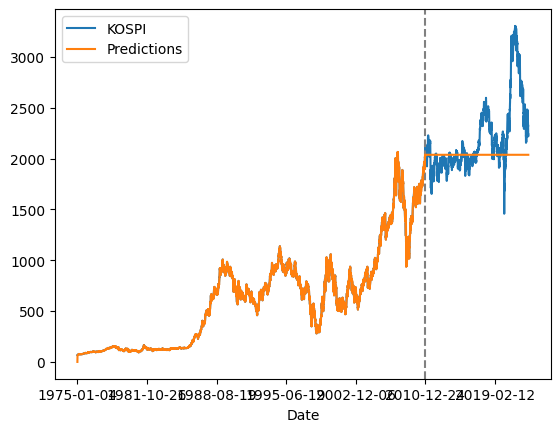

In [18]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(series[:10000], order=(0,1,2))
model_fit = model.fit()

series.plot()
model_fit.predict(end=12965).plot(label='Predictions')
plt.axvline(x=10000, color='gray', linestyle='--')
plt.legend()
plt.show()


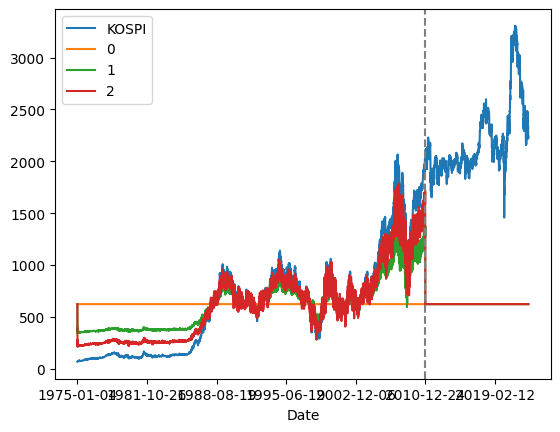

In [27]:
model1 = ARIMA(series[:10000], order=(0, 0, 0))
model_fit1 = model1.fit()
model2 = ARIMA(series[:10000], order=(0, 0, 1))
model_fit2 = model2.fit()
model3 = ARIMA(series[:10000], order=(0, 0, 2))
model_fit3 = model3.fit()

series.plot()
model_fit1.predict(end=12965).plot(label='0')
model_fit2.predict(end=12965).plot(label='1')
model_fit3.predict(end=12965).plot(label='2')
plt.axvline(x=10000, color='gray', linestyle='--')
plt.legend()
plt.show()
